In [1]:
# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for NLP
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer, sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Packages for ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# Packages for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Package for multiprocessing
import multiprocessing

In [187]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ds255088\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ds255088\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ds255088\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Reading file

In [2]:
df = pd.read_csv('fake_job_postings.csv', header = 0)
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Analysing dataset and data cleaning

In [3]:
# Checking number of rows and columns
df.shape

(17880, 18)

In [4]:
# Checking datatype of each column
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [5]:
# Checking the missing values in each column
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
# Checking the number of fradulent and non-fraudulent columns
y=df['fraudulent'].value_counts()
y

0    17014
1      866
Name: fraudulent, dtype: int64

In [7]:
# Checking the % of missing values in each column
na_rate = (df.isna().sum() / 17880) * 100
print (na_rate)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


In [8]:
len(df.columns)

18

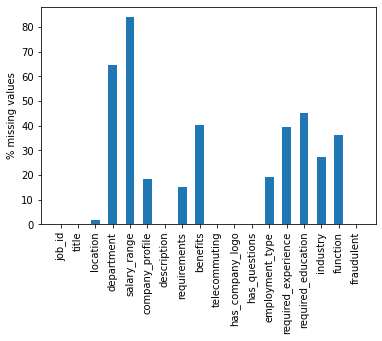

In [9]:
plt.bar(df.columns, na_rate, width = 0.5)
plt.xticks(rotation = 90)
plt.ylabel('% missing values')
plt.show()

In [3]:
# Dropping department and salary range features
df = df.drop(columns=['job_id','department','salary_range'])
df.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [206]:
df.shape

(17880, 15)

In [4]:
#Drop rows if 5 column value are missing
df = df.dropna(axis = 0, thresh=9)
df.shape

(16712, 15)

#### EDA

In [148]:
df_eda = df

In [150]:
# Calculating % of missing columns from df_eda dataset
na_rate = (df_eda.isna().sum() / 17880) * 100
print (na_rate)

title                   0.000000
location                0.833333
company_profile        15.380313
description             0.000000
requirements           10.039150
benefits               33.982103
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        13.064877
required_experience    32.908277
required_education     38.803132
industry               20.995526
function               29.574944
fraudulent              0.000000
dtype: float64


In [151]:
# Replacing missing values with noot mentioned because we are going to 
#df_eda = df_eda.dropna(subset = ['benefits', 'employment_type', 'required_experience', 'industry', 'required_education', 'function'])

df_eda['benefits'] = df_eda['benefits'].replace(np.nan, 'Not Mentioned', regex = True)
df_eda['employment_type'] = df_eda['employment_type'].replace(np.nan, 'Not Mentioned', regex = True)
df_eda['required_experience'] = df_eda['required_experience'].replace(np.nan, 'Not Mentioned', regex = True)
df_eda['industry'] = df_eda['industry'].replace(np.nan, 'Not Mentioned', regex = True)
df_eda['required_education'] = df_eda['required_education'].replace(np.nan, 'Not Mentioned', regex = True)
df_eda['function'] = df_eda['function'].replace(np.nan, 'Not Mentioned', regex = True)
df_eda.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Not Mentioned,0,1,0,Other,Internship,Not Mentioned,Not Mentioned,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Not Mentioned,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Not Mentioned,0,1,0,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,Not Mentioned,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Visualizations

Text(0, 0.5, '')

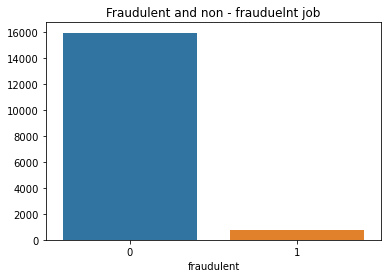

In [59]:
# Visualizing number of fraudulent and non-fraudulent job
sns.countplot(x = df_eda.fraudulent, data = df_eda)
plt.title("Fraudulent and non - frauduelnt job")
plt.ylabel("")

Text(0, 0.5, '')

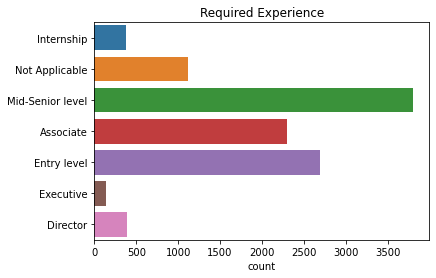

In [152]:
# Countplot for required experience in all job postings
sns.countplot(y="required_experience", data=df_eda[-(df_eda.required_experience == 'Not Mentioned')])
plt.title("Required Experience")
plt.ylabel("")

Text(0, 0.5, '')

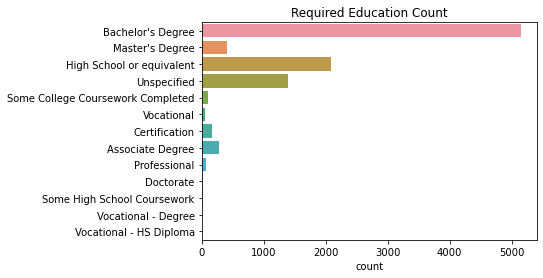

In [155]:
# Countplot for required education in all job postings
sns.countplot(y = "required_education", data = df_eda[-(df_eda.required_education == 'Not Mentioned')])
plt.title("Required Education Count")
plt.ylabel("")

Text(0, 0.5, '')

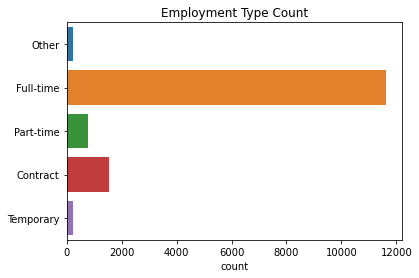

In [156]:
# Countplot for employment type in all job postings
sns.countplot(y = "employment_type", data = df_eda[-(df_eda.employment_type == 'Not Mentioned')])
plt.title("Employment Type Count")
plt.ylabel("")

In [163]:
industry_15 = df_eda.industry.value_counts()[:15]
function_15 = df_eda.function.value_counts()[:15]

Text(0, 0.5, '')

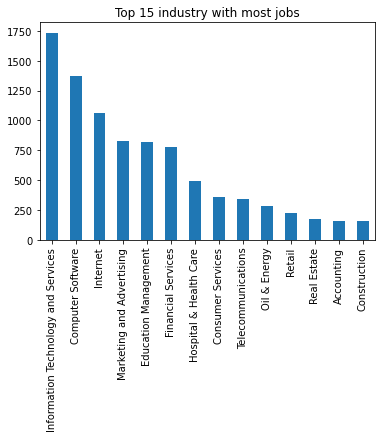

In [164]:
# Countplot for top 10 industry in all job postings
industry_15[1:].plot(kind = 'bar')
plt.title("Top 15 industry with most jobs")
plt.ylabel("")

Text(0, 0.5, '')

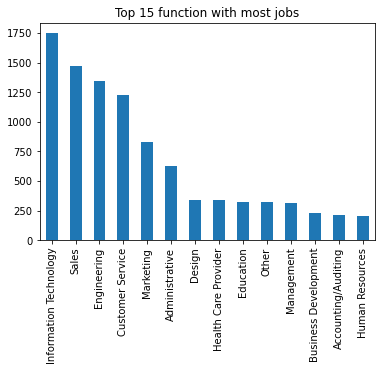

In [165]:
# Countplot for Top 10 function in all job postings
function_15[1:].plot(kind = 'bar')
plt.title("Top 15 function with most jobs")
plt.ylabel("")

In [66]:
# Splitting location column
df_eda_loc = df_eda.location.str.split(",",expand = True)
df_eda_loc.head()

,0,1,2,3,4,5,6,7,8,9,10
0,US,NY,New York,None,None,None,None,None,None,None,None
1,NZ,,Auckland,None,None,None,None,None,None,None,None
2,US,IA,Wever,None,None,None,None,None,None,None,None
3,US,DC,Washington,None,None,None,None,None,None,None,None
4,US,FL,Fort Worth,None,None,None,None,None,None,None,None


In [67]:
# Creating country column
df_eda['country'] = df_eda_loc[0]

In [78]:
country_15 = df_eda.country.value_counts()[:15]

Text(0, 0.5, '')

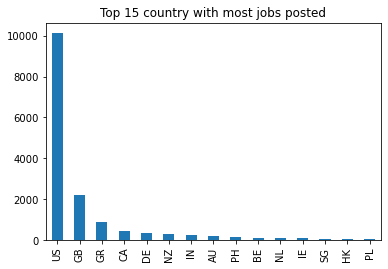

In [79]:
# Countplot for job posted in each country
country_15.plot(kind = 'bar')
plt.title("Top 15 country with most jobs posted")
plt.ylabel("")

#### EDA For Fraudulent Data

In [166]:
# Creating a fraudulent jobs dataset
df_eda_1 = df_eda[df_eda['fraudulent'] == 1]

Text(0, 0.5, '')

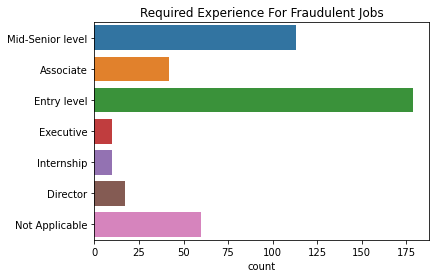

In [158]:
# Countplot for required experience in fraudulent job postings
sns.countplot(y = "required_experience", data=df_eda_1[-(df_eda_1.required_experience == 'Not Mentioned')])
plt.title("Required Experience For Fraudulent Jobs")
plt.ylabel("")

Text(0, 0.5, '')

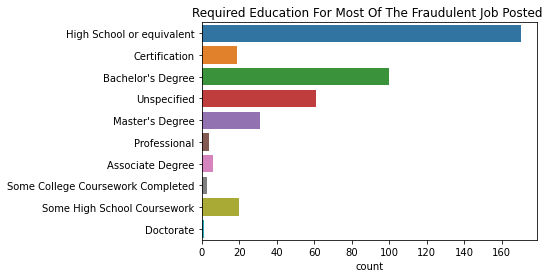

In [159]:
# Countplot for required education in fraudulent job postings
sns.countplot(y = "required_education", data=df_eda_1[-(df_eda_1.required_education == 'Not Mentioned')])
plt.title("Required Education For Most Of The Fraudulent Job Posted ")
plt.ylabel("")

Text(0, 0.5, '')

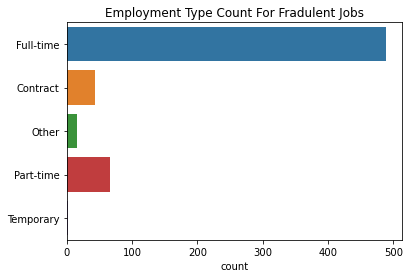

In [160]:
# Countplot for employment type in fraudulent job postings
sns.countplot(y = "employment_type", data=df_eda_1[-(df_eda_1.employment_type == 'Not Mentioned')])
plt.title("Employment Type Count For Fradulent Jobs")
plt.ylabel("")

In [167]:
industry_15 = df_eda_1.industry.value_counts()[:15]
function_15 = df_eda_1.function.value_counts()[:15]

Text(0, 0.5, '')

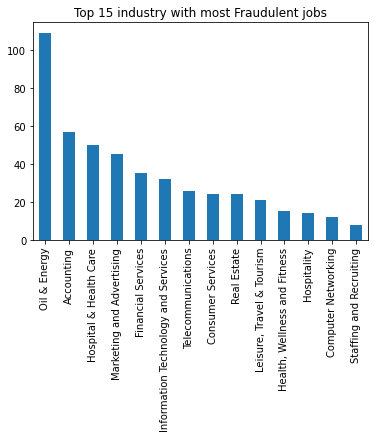

In [171]:
# Countplot for Top 10 industry in fraudulent job postings
industry_15[1:].plot(kind = 'bar')
plt.title("Top 15 industry with most Fraudulent jobs")
plt.ylabel("")

Text(0, 0.5, '')

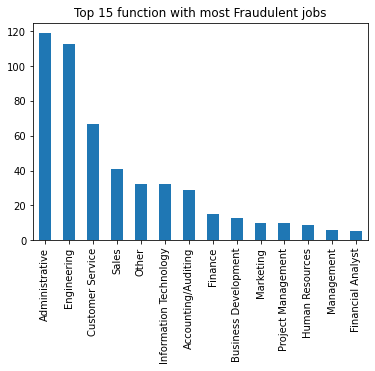

In [170]:
# Countplot for Top 10 function in fraudulent job postings
function_15[1:].plot(kind = 'bar')
plt.title("Top 15 function with most Fraudulent jobs")
plt.ylabel("")

In [11]:
# Splitting location column
df_eda_loc = df_eda_1.location.str.split(",",expand = True)
df_eda_loc.head()

,0,1,2,3,4,5,6,7,8,9,10
98,US,,Stocton,CA,None,None,None,None,None,None,None
144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,US,None,None,None,None,None,None,None,None,None,None
180,PK,SD,Karachi,None,None,None,None,None,None,None,None
215,US,CA,Bakersfield,CA / Mt. Poso,None,None,None,None,None,None,None


In [14]:
df_eda_1['country'] = df_eda_loc[0]
#df_eda_1.head()


<ipython-input-14-22612b22cf27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda_1['country'] = df_eda_loc[0]


Text(0, 0.5, '')

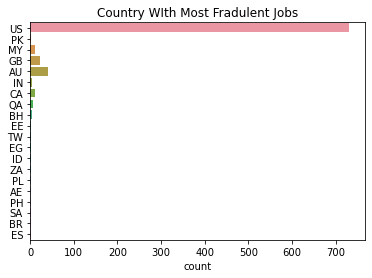

In [15]:
# Countplot for fraudulent job postings in each country
sns.countplot(y = df_eda_1.country, data = df_eda_1)
plt.title("Country WIth Most Fradulent Jobs")
plt.ylabel("")

### Pre-processing

In [5]:
# Replacing missing values with blank
df['benefits'] = df['benefits'].replace(np.nan, '', regex = True)
df['employment_type'] = df['employment_type'].replace(np.nan, '', regex = True)
df['required_experience'] = df['required_experience'].replace(np.nan, '', regex = True)
df['industry'] = df['industry'].replace(np.nan, '', regex = True)
df['required_education'] = df['required_education'].replace(np.nan, '', regex = True)
df['function'] = df['function'].replace(np.nan, '', regex = True)
df['title'] = df['title'].replace(np.nan, '', regex = True)
df['location'] = df['location'].replace(np.nan, '', regex = True)
df['company_profile'] = df['company_profile'].replace(np.nan, '', regex = True)
df['description'] = df['description'].replace(np.nan, '', regex = True)
df['requirements'] = df['requirements'].replace(np.nan, '', regex = True)


In [6]:
# Merging textual columns
df['textdata'] = df['title'] + ' ' + df['location'] + ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['employment_type'] + ' ' + df['required_education'] + ' ' + df['industry'] + ' ' + df['function'] 

In [7]:
# Dropping already merged columns
df = df.drop(columns=['title','location','company_profile','description','requirements','benefits', 'employment_type',
                      'description', 'requirements','benefits','employment_type','required_education','required_experience','industry','function'])
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,textdata
0,0,1,0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [8]:
# Taking subset of fraudulent dataset from original dataset
df_1 = df[df['fraudulent'] == 1]

In [9]:
# Taking subset of non fraudulent dataset from original dataset
fraudulent_data = df[df['fraudulent'] == 0]
fraudulent_data.head()

,telecommuting,has_company_logo,has_questions,fraudulent,textdata
0,0,1,0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotSou..."


In [10]:
# Randomly selecting s1227 data rows from non fraudulent dataset to remove the unbalance nature of dataset
fraud_df = fraudulent_data.sample(n=1227)
fraud_df.shape

(1227, 5)

In [11]:
# Merging 2 datasets into 1
df =pd.concat([df_1,fraud_df])

In [12]:
# Checking the shape of new dataset
df.shape

(2000, 5)

In [13]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,textdata
98,0,1,1,1,"IC&E Technician US, , Stocton, CA ..."
173,0,1,1,1,Technician Instrument & Controls US Edison In...
180,0,0,0,1,"Sales Executive PK, SD, Karachi Sales Executi..."
215,0,1,1,1,"IC&E Technician Mt Poso US, CA, Bakersfield, C..."
357,0,0,0,1,"Financing Auto(car) sales US, IL, hazelcrest L..."


In [14]:
# load stop-words
stop_words = set(stopwords.words('english'))

# initialize tokenizer
regexp_tokenizer = RegexpTokenizer('[\'a-zA-Z]+')

# initialize lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# initialize stemmer
porter_stemmer = PorterStemmer()

In [15]:
def text_process(document, rebuild_document=True):
    import re
    words = []
    
    for sentence in sent_tokenize(document):
        tokens = [wordnet_lemmatizer.lemmatize(t.lower())
        for t in regexp_tokenizer.tokenize(sentence) if t.lower() not in stop_words]
        words += tokens

    if rebuild_document:
        #### rebuild the sentence
        content = ' '.join(words).strip()

        content = content.replace(r"'"," ")
        content = re.sub('s\+', ' ', content)
        content = content.strip()
        
        return content
    else:
        return words

In [16]:
textdata_X = []
token_textdata_X = []
textdata_Y = []

In [17]:
for index, row in df.iterrows():
    category = row.fraudulent
    text = row.textdata


    textdata_X.append(text_process(text))
    token_textdata_X.append(text_process(text,False))
    textdata_Y.append(df['fraudulent'])

In [18]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
textdata_X_vec = tfidf_vectorizer.fit_transform(df.textdata.values)

In [19]:
df.shape

(2000, 5)

In [20]:
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(textdata_X_vec.toarray(), df['fraudulent'], test_size=0.25, random_state=1)

### Logistic Regression

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
parameters = {'C' : [0.1, 0.5, 1, 10, 15, 20], 'penalty':['l1','l2']}
lr = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy', cv=7, n_jobs=multiprocessing.cpu_count(), verbose=1)
lr.fit(X_train_scaled, Y_train)

lr_best = lr.best_estimator_
lr_best.fit(X_train_scaled,Y_train)

print('Best model: %s' % str(lr.best_params_))
print('Best score: %f' % lr.best_score_)
print('Best test accuracy: %f' % lr_best.score(X_test_scaled,Y_test))

Fitting 7 folds for each of 12 candidates, totalling 84 fits


C:\Users\ds255088\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.93268234        nan 0.93201478        nan 0.93201478
        nan 0.93334679        nan 0.93201167        nan 0.93134722]
  warnings.warn(


Best model: {'C': 10, 'penalty': 'l2'}
Best score: 0.933347
Best test accuracy: 0.952000


In [40]:
y_pred = lr_best.predict(X_test_scaled)

In [41]:
confusion_matrix = metrics.confusion_matrix(y_pred,Y_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index = ['0', '1'],
                                  columns = ['0', '1'])
confusion_matrix_df

,0,1
0,302,22
1,2,174


In [42]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       324
           1       0.89      0.99      0.94       176

    accuracy                           0.95       500
   macro avg       0.94      0.96      0.95       500
weighted avg       0.96      0.95      0.95       500



In [43]:
# Auc Score MNB
pred_prob1 = lr_best.predict_proba(X_test_scaled)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

0.9843414339419979


### Multinomial Naive Bayes

In [37]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (0,1)).fit(X_train)
X_train_scaled = min_max_scaler.transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [39]:
from sklearn.naive_bayes import MultinomialNB
parameters = {'alpha' : (0.0, 0.0001, 0.001, 0.01, 0.005, 0.5, 1)}
MNB = GridSearchCV(MultinomialNB(), parameters, scoring='accuracy', cv=7, n_jobs=multiprocessing.cpu_count(), verbose=1)
MNB.fit(X_train_scaled, Y_train)

MNB_best = MNB.best_estimator_
MNB_best.fit(X_train_scaled,Y_train)

print('Best model: %s' % str(MNB.best_params_))
print('Best score: %f' % MNB.best_score_)
print('Best test accuracy: %f' % MNB_best.score(X_test_scaled,Y_test))

Fitting 7 folds for each of 7 candidates, totalling 49 fits
Best model: {'alpha': 0.0001}
Best score: 0.927994
Best test accuracy: 0.904000


In [40]:
y_pred = MNB_best.predict(X_test_scaled)

In [41]:
confusion_matrix = metrics.confusion_matrix(y_pred,Y_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index = ['0', '1'],
                                  columns = ['0', '1'])
confusion_matrix_df

,0,1
0,294,38
1,10,158


In [42]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.89      0.92       332
           1       0.81      0.94      0.87       168

    accuracy                           0.90       500
   macro avg       0.89      0.91      0.90       500
weighted avg       0.91      0.90      0.91       500



In [43]:
# Auc Score MNB
pred_prob1 = MNB_best.predict_proba(X_test_scaled)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

0.9623388829215896


### SVM

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
param_grid = {
    'kernel': ['linear','rbf'],
    'C': [1,10],
    'gamma': [0.1, 0.01, 0.001],
    'probability' : [True]
}

svm_svc = GridSearchCV(estimator=SVC() , param_grid=param_grid ,
        scoring='accuracy', cv=7, n_jobs=multiprocessing.cpu_count(), verbose=1)

svm_svc.fit(X_train_scaled, Y_train)

Fitting 7 folds for each of 12 candidates, totalling 84 fits


GridSearchCV(cv=7, estimator=SVC(), n_jobs=12,
             param_grid={'C': [1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf'], 'probability': [True]},
             scoring='accuracy', verbose=1)

In [23]:
svm_svc_best = svm_svc.best_estimator_
svm_svc_best.fit(X_train_scaled,Y_train)

print('Best model: %s' % str(svm_svc.best_params_))
print('Best score: %f' % svm_svc.best_score_)
print('Best test accuracy: %f' % svm_svc_best.score(X_test_scaled,Y_test))

Best model: {'C': 1, 'gamma': 0.1, 'kernel': 'linear', 'probability': True}
Best score: 0.931325
Best test accuracy: 0.942000


In [24]:
y_pred = svm_svc_best.predict(X_test_scaled)

In [25]:
confusion_matrix = metrics.confusion_matrix(y_pred,Y_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index = ['0', '1'],
                                  columns = ['0', '1'])
confusion_matrix_df

,0,1
0,297,22
1,7,174


In [26]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       319
           1       0.89      0.96      0.92       181

    accuracy                           0.94       500
   macro avg       0.93      0.95      0.94       500
weighted avg       0.94      0.94      0.94       500



In [27]:
# Auc Score SVM
pred_prob1 = svm_svc_best.predict_proba(X_test_scaled)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

0.9842575187969925


### Decision Tree

In [225]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3,10),
    'max_leaf_nodes': range(2,10)
}

dt_gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid ,
        scoring='accuracy', cv= 7, n_jobs=multiprocessing.cpu_count(), verbose=1)

dt_gs.fit(X_train_scaled, Y_train)

Fitting 7 folds for each of 112 candidates, totalling 784 fits


GridSearchCV(cv=7, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'max_leaf_nodes': range(2, 10)},
             scoring='roc_auc', verbose=1)

In [226]:
dt_best = dt_gs.best_estimator_
dt_best.fit(X_train_scaled,Y_train)

print('Best model: %s' % str(dt_gs.best_params_))
print('Best score: %f' % dt_gs.best_score_)
print('Best test auc: %f' % dt_best.score(X_test_scaled,Y_test))

Best model: {'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 9}
Best score: 0.832019
Best test auc: 0.764000


In [69]:
y_pred = dt_best.predict(X_test_scaled)

In [70]:
confusion_matrix = metrics.confusion_matrix(y_pred,Y_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index = ['0', '1'],
                                  columns = ['0', '1'])
confusion_matrix_df

,0,1
0,247,49
1,57,147


In [71]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       296
           1       0.75      0.72      0.73       204

    accuracy                           0.79       500
   macro avg       0.78      0.78      0.78       500
weighted avg       0.79      0.79      0.79       500



In [77]:
# Auc Score Decision Tree
pred_prob1 = dt_best.predict_proba(X_test_scaled)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

0.843170985499463


### RandomForest Classifier

In [228]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [1,5,10,15,20],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 15]
}

rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid ,
        scoring='accuracy', cv=7, n_jobs=multiprocessing.cpu_count(), verbose=1)

rf.fit(X_train_scaled, Y_train)

rf_best = rf.best_estimator_
rf_best.fit(X_train_scaled,Y_train)

print('Best model: %s' % str(rf.best_params_))
print('Best score: %f' % rf.best_score_)
print('Best test auc: %f' % rf_best.score(X_test_scaled,Y_test))

Fitting 7 folds for each of 60 candidates, totalling 420 fits
Best model: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}
Best score: 0.889350
Best test auc: 0.886000


In [229]:
y_pred = rf_best.predict(X_test_scaled)

In [230]:
confusion_matrix = metrics.confusion_matrix(y_pred,Y_test)
confusion_matrix_df = pd.DataFrame(confusion_matrix, index = ['0', '1'],
                                  columns = ['0', '1'])
confusion_matrix_df

,0,1
0,297,50
1,7,146


In [231]:
print(classification_report(y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       347
           1       0.74      0.95      0.84       153

    accuracy                           0.89       500
   macro avg       0.86      0.91      0.87       500
weighted avg       0.91      0.89      0.89       500



In [232]:
# AUC Score Random Forest Classifier
pred_prob1 = rf_best.predict_proba(X_test_scaled)


# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)


# auc scores
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])

print(auc_score1)

0.97328141783029
